<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning2020/blob/main/hyperopt_optuna_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Hyperopt demo - minimize x^2 function

from hyperopt import fmin, tpe, rand, hp, STATUS_OK, Trials, plotting
import matplotlib.pyplot as plt

fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}
    
trials = Trials()

# possible algos: algo= (tpe.suggest, rand.suggest)
best = fmin(fn=f, space=fspace, algo=rand.suggest,  max_evals=1000, trials=trials)
print('best:', best)
print(' trials:')

#for trial in trials.trials[:2]:
#    print(trial)




100%|██████████| 1000/1000 [00:01<00:00, 890.09it/s, best loss: 7.991198022504897e-05]
best: {'x': -0.00893935010082103}
 trials:


In [18]:
#print(trials.trials)

avg best error: 7.991198022504897e-05


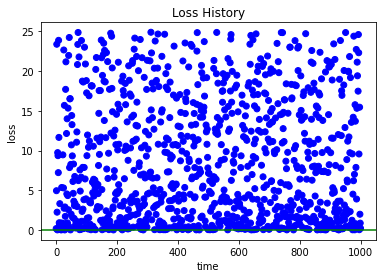

In [19]:
plotting.main_plot_history(trials)

Showing Histogram of 1000 jobs


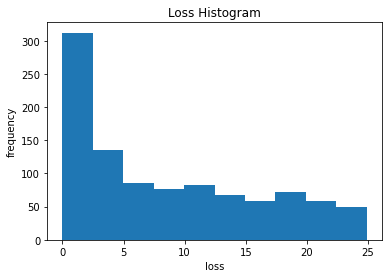

In [20]:
plotting.main_plot_histogram(trials)

finite loss range 7.991198022504897e-05 24.893638858069806 -0.9999200880197749


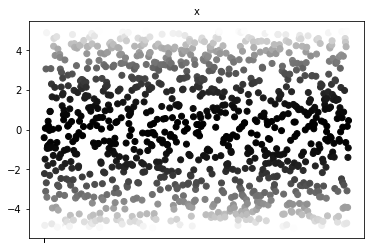

In [21]:
plotting.main_plot_vars(trials)

Text(0, 0.5, '$x$')

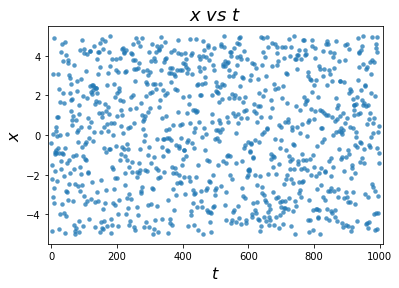

In [22]:
f, ax = plt.subplots(1)

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]

ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0, 0.5, '$val$')

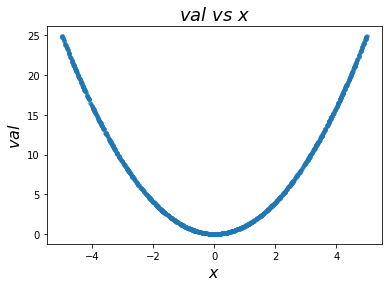

In [23]:
f, ax = plt.subplots(1)

xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)

# **Optuna demo**

In [24]:
# install optuna
! pip install optuna

In [25]:


import optuna

def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    y = trial.suggest_uniform('y', -10, 10)



    return (x - 2) ** 2 + (y-1) ** 2

study = optuna.create_study()
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler() )

study.optimize(objective, n_trials=200)

study.best_params  # E.g. {'x': 2.0912375440412942, 'y': 1.0091490823506173}

[I 2020-12-05 19:54:17,581] A new study created in memory with name: no-name-b4adc077-0505-4a44-81a2-23329f6b326a
[I 2020-12-05 19:54:17,585] A new study created in memory with name: no-name-6043ce6a-905f-430e-9b91-e115324e2bcd
[I 2020-12-05 19:54:17,588] Trial 0 finished with value: 146.11349937211827 and parameters: {'x': -7.72152037347613, 'y': 8.183699673580932}. Best is trial 0 with value: 146.11349937211827.
[I 2020-12-05 19:54:17,590] Trial 1 finished with value: 11.602355965991604 and parameters: {'x': 2.1635031494532324, 'y': 4.402296678144115}. Best is trial 1 with value: 11.602355965991604.
[I 2020-12-05 19:54:17,592] Trial 2 finished with value: 40.44955837930131 and parameters: {'x': -4.215508607726395, 'y': 2.347965550962039}. Best is trial 1 with value: 11.602355965991604.
[I 2020-12-05 19:54:17,594] Trial 3 finished with value: 25.28622921012242 and parameters: {'x': -1.8803364033418486, 'y': 4.198314963699239}. Best is trial 1 with value: 11.602355965991604.
[I 2020-12

{'x': 1.996324057218495, 'y': 1.0046034070111949}

## Visualizing the Optimization History

In [26]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

## Visualizing High-dimensional Parameter Relationships

In [27]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study, params=['x', 'y'])

## Visualizing Parameter Relationships

In [28]:
from optuna.visualization import plot_contour

plot_contour(study)

### Selecting Parameters to Visualize

In [29]:
plot_contour(study, params=['x', 'y'])

## Visualizing Individual Parameters

In [30]:
from optuna.visualization import plot_slice

plot_slice(study)

### Selecting Parameters to Visualize

In [31]:
plot_slice(study, params=['x', 'y'])

## Visualizing Parameter Importances

In [32]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)